In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
### Articles

In [2]:
# read data
df_articles = pd.read_csv("/kaggle/input/h-and-m-personalized-fashion-recommendations/articles.csv")
# drop duplicates
df_articles.drop_duplicates(inplace=True)
# reduce memory usage
df_articles['article_id'] = df_articles['article_id'].astype('int32')
# display a few rows
display(df_articles.head())
print()
# display information
display(df_articles.info())
print()
# missing information %
print("Missing values (%):")
print(df_articles.isna().sum() * 100 / len(df_articles))

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."



<class 'pandas.core.frame.DataFrame'>
Int64Index: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int32 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13

None


Missing values (%):
article_id                      0.000000
product_code                    0.000000
prod_name                       0.000000
product_type_no                 0.000000
product_type_name               0.000000
product_group_name              0.000000
graphical_appearance_no         0.000000
graphical_appearance_name       0.000000
colour_group_code               0.000000
colour_group_name               0.000000
perceived_colour_value_id       0.000000
perceived_colour_value_name     0.000000
perceived_colour_master_id      0.000000
perceived_colour_master_name    0.000000
department_no                   0.000000
department_name                 0.000000
index_code                      0.000000
index_name                      0.000000
index_group_no                  0.000000
index_group_name                0.000000
section_no                      0.000000
section_name                    0.000000
garment_group_no                0.000000
garment_group_name              0.00

In [3]:
for col in df_articles.columns:
    print(col, ":")
    print(" ", df_articles[col].nunique(), "distinct values")

article_id :
  105542 distinct values
product_code :
  47224 distinct values
prod_name :
  45875 distinct values
product_type_no :
  132 distinct values
product_type_name :
  131 distinct values
product_group_name :
  19 distinct values
graphical_appearance_no :
  30 distinct values
graphical_appearance_name :
  30 distinct values
colour_group_code :
  50 distinct values
colour_group_name :
  50 distinct values
perceived_colour_value_id :
  8 distinct values
perceived_colour_value_name :
  8 distinct values
perceived_colour_master_id :
  20 distinct values
perceived_colour_master_name :
  20 distinct values
department_no :
  299 distinct values
department_name :
  250 distinct values
index_code :
  10 distinct values
index_name :
  10 distinct values
index_group_no :
  5 distinct values
index_group_name :
  5 distinct values
section_no :
  57 distinct values
section_name :
  56 distinct values
garment_group_no :
  21 distinct values
garment_group_name :
  21 distinct values
detail_desc

### Customers

In [4]:
# read data
df_customers = pd.read_csv("/kaggle/input/h-and-m-personalized-fashion-recommendations/customers.csv")
# drop duplicates
df_customers.drop_duplicates(inplace=True)
# reduce memory usage
df_customers['customer_id'] =\
    df_customers['customer_id'].apply(lambda x: int(x[-16:],16) ).astype('int64')
# display a few rows
display(df_customers.head())
print()
# display information
display(df_customers.info())
print()
# missing information %
print("Missing values (%):")
print(df_customers.isna().sum() * 100 / len(df_customers))

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,6883939031699146327,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,-7200416642310594310,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,-6846340800584936,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,-94071612138601410,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,-283965518499174310,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  int64  
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 83.7+ MB


None


Missing values (%):
customer_id                0.000000
FN                        65.237831
Active                    66.150819
club_member_status         0.441843
fashion_news_frequency     1.166854
age                        1.156066
postal_code                0.000000
dtype: float64


### Transactions

In [5]:
# read data
df_transactions = pd.read_csv("/kaggle/input/h-and-m-personalized-fashion-recommendations/transactions_train.csv")
# reduce memory usage
df_transactions['article_id'] = df_transactions['article_id'].astype('int32')
df_transactions['customer_id'] =\
    df_transactions['customer_id'].apply(lambda x: int(x[-16:],16) ).astype('int64')
# handle the date column
df_transactions.t_dat = pd.to_datetime(df_transactions.t_dat)
df_transactions['year'] = (df_transactions.t_dat.dt.year-2000).astype('int8')
df_transactions['month'] = (df_transactions.t_dat.dt.month).astype('int8')
df_transactions['day'] = (df_transactions.t_dat.dt.day).astype('int8')
#del df_transactions['t_dat']
# display a few rows
display(df_transactions)
print()
# display information
display(df_transactions.info())
print()
# missing information %
print("Missing values (%):")
print(df_transactions.isna().sum() * 100 / len(df_transactions))

,t_dat,customer_id,article_id,price,sales_channel_id,year,month,day
0,2018-09-20,-6846340800584936,663713001,0.050831,2,18,9,20
1,2018-09-20,-6846340800584936,541518023,0.030492,2,18,9,20
2,2018-09-20,-8334631767138808638,505221004,0.015237,2,18,9,20
3,2018-09-20,-8334631767138808638,685687003,0.016932,2,18,9,20
4,2018-09-20,-8334631767138808638,685687004,0.016932,2,18,9,20
...,...,...,...,...,...,...,...,...
31788319,2020-09-22,4685485978980270934,929511001,0.059305,2,20,9,22
31788320,2020-09-22,4685485978980270934,891322004,0.042356,2,20,9,22
31788321,2020-09-22,3959348689921271969,918325001,0.043203,1,20,9,22
31788322,2020-09-22,-8639340045377511665,833459002,0.006763,1,20,9,22



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 8 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       int64         
 2   article_id        int32         
 3   price             float64       
 4   sales_channel_id  int64         
 5   year              int8          
 6   month             int8          
 7   day               int8          
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), int8(3)
memory usage: 1.2 GB


None


Missing values (%):
t_dat               0.0
customer_id         0.0
article_id          0.0
price               0.0
sales_channel_id    0.0
year                0.0
month               0.0
day                 0.0
dtype: float64


The transaction data from period **20 Sept 2018** till **22 Sept 2020** were given.
Select full year data in **2019** for analysis.

In [6]:
df_transactions = df_transactions[df_transactions['year']==19]

# Data Analysis
### Which articles are the bestsellers?

In [7]:
bestsellers_ranking = df_transactions.groupby('article_id').count().sort_values(by='customer_id', ascending=False)
bestsellers_ranking.head(5)

,t_dat,customer_id,price,sales_channel_id,year,month,day
article_id,,,,,,,
706016001,29869,29869,29869,29869,29869,29869,29869
706016002,22293,22293,22293,22293,22293,22293,22293
372860001,15553,15553,15553,15553,15553,15553,15553
759871002,13872,13872,13872,13872,13872,13872,13872
464297007,12869,12869,12869,12869,12869,12869,12869


The top bestseller article has an average sales of 29869/365 ~= 82 units per day. The bestseller ranked number five has an average sales of 12869/365 ~= 35 units per day, which is less than half of the sales of the top bestseller.

In [8]:
# add 2019 sales data to df_articles
article_sales = df_transactions.groupby('article_id').count()
def f(x):
    try:
        return article_sales.loc[x]['customer_id']
    except:
        return 0
df_articles['total_sales_2019'] = df_articles['article_id'].apply(f)
df_articles

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,total_sales_2019
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,5730
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,4993
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,2
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",520
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...,0
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...,0
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec...",0
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.,0


In [9]:
to_drop = ['product_type_no',
 'graphical_appearance_no',
 'colour_group_code',
 'perceived_colour_value_id',
 'perceived_colour_master_id',
 'department_no',
 'index_code',
 'index_group_no',
 'section_no',
 'garment_group_no']
df_articles.drop(columns=to_drop, axis=1, inplace=True)

In [10]:
df_articles.sort_values(by='total_sales_2019', ascending=False).head(10)

,article_id,product_code,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc,total_sales_2019
53892,706016001,706016,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Solid,Black,Dark,Black,Trousers,Divided,Divided,Divided Collection,Trousers,High-waisted jeans in washed superstretch deni...,29869
53893,706016002,706016,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Solid,Light Blue,Light,Blue,Trousers,Divided,Divided,Divided Collection,Trousers,High-waisted jeans in washed superstretch deni...,22293
1713,372860001,372860,7p Basic Shaftless,Socks,Socks & Tights,Solid,Black,Dark,Black,Shopbasket Socks,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Fine-knit trainer socks in a soft cotton blend.,15553
70221,759871002,759871,Tilda tank,Vest top,Garment Upper body,Solid,Black,Dark,Black,EQ Divided Basics,Divided,Divided,Divided Complements Other,Jersey Basic,"Cropped, fitted top in cotton jersey with narr...",13872
3711,464297007,464297,Greta Thong Mynta Low 3p,Underwear bottom,Underwear,Placement print,Black,Dark,Black,Casual Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear",Thong briefs in cotton jersey with a wide lace...,12869
53894,706016003,706016,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Solid,Dark Blue,Medium Dusty,Blue,Trousers,Divided,Divided,Divided Collection,Trousers,High-waisted jeans in washed superstretch deni...,12540
14253,562245046,562245,Luna skinny RW,Trousers,Garment Lower body,Solid,Black,Dark,Black,Trouser,Ladieswear,Ladieswear,Womens Everyday Collection,Trousers,"5-pocket jeans in washed, superstretch denim w...",12325
67,156231001,156231,Box 4p Tights,Underwear Tights,Socks & Tights,Solid,Black,Dark,Black,Tights basic,Lingeries/Tights,Ladieswear,"Womens Nightwear, Socks & Tigh",Socks and Tights,Matt tights with an elasticated waist. 20 denier.,11891
42626,673677002,673677,Henry polo. (1),Sweater,Garment Upper body,Solid,Black,Dark,Black,Knitwear,Ladieswear,Ladieswear,Womens Tailoring,Knitwear,"Jumper in a soft, fine knit with a ribbed polo...",11876
42557,673396002,673396,Ringo hipbelt,Belt,Accessories,Solid,Black,Dark,Black,Belts,Ladies Accessories,Ladieswear,Womens Big accessories,Accessories,Belt in grained imitation leather with a metal...,11830


The top two bestsellers are denim `Trousers`, with black colour having more sales than light blue. 8 out of the top 10 topsellers are `Black`. 

From before, there are 105542 distinct `article_id` in the articles dataset. Hence we define the **top 1000** (~1%) articles with most sales as a **bestseller**. 

In [11]:
bestsellers = df_articles.sort_values(by='total_sales_2019', ascending=False).head(1000)

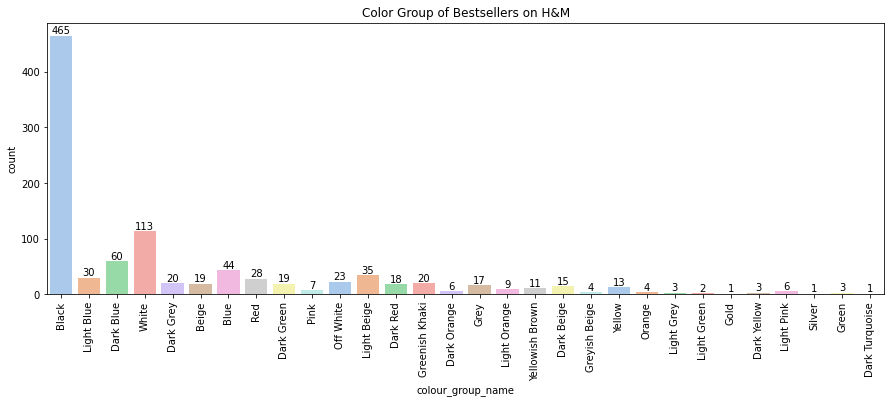

In [12]:
plt.figure(figsize=(15,5))
g = sns.countplot(x="colour_group_name", #Show count of observations
                  data=bestsellers,
                  palette="pastel")
g.bar_label(g.containers[0])
g.tick_params(axis='x', rotation=90)
plt.title('Color Group of Bestsellers on H&M')
plt.show(g)

`Black` is indeed the most popular colour.

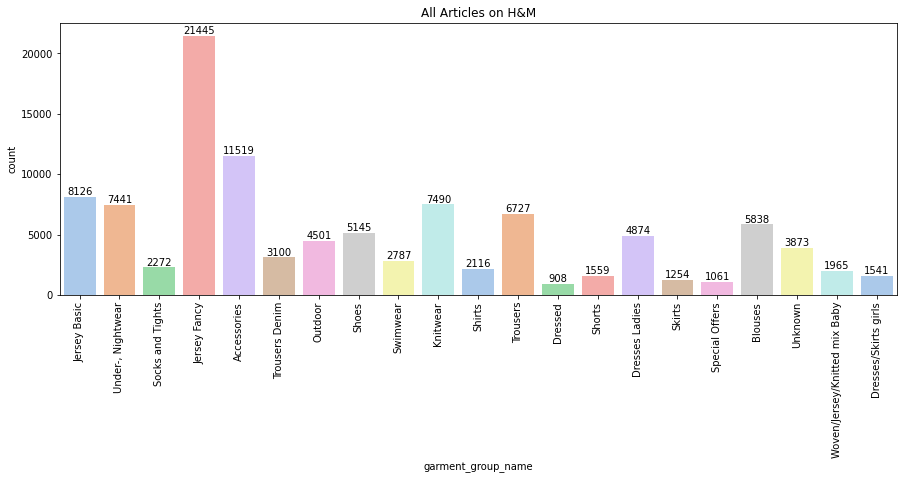

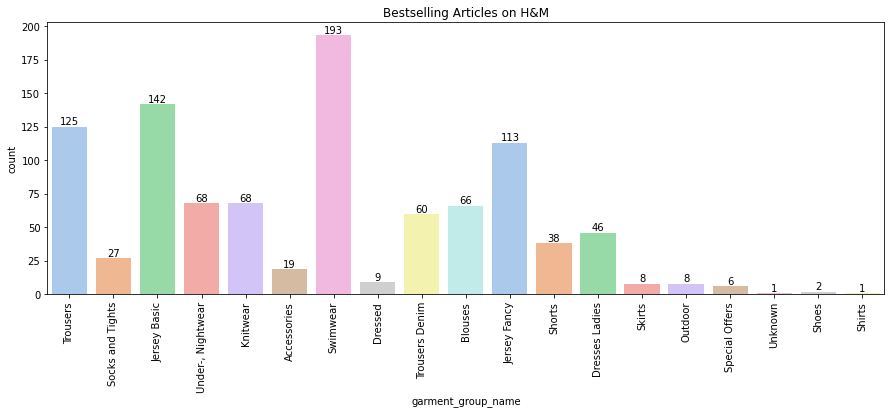

In [13]:
plt.figure(figsize=(15,5))
g = sns.countplot(x="garment_group_name", #Show count of observations
                  #data=df_articles[df_articles['total_sales_2019'] >= 8000],
                  data=df_articles,
                  palette="pastel")
g.bar_label(g.containers[0])
g.tick_params(axis='x', rotation=90)
plt.title('All Articles on H&M')
plt.show(g)
plt.figure(figsize=(15,5))
h = sns.countplot(x="garment_group_name", #Show count of observations
                  data=bestsellers,
                  #data=df_articles,
                  palette="pastel")
h.bar_label(h.containers[0])
h.tick_params(axis='x', rotation=90)
plt.title('Bestselling Articles on H&M')
plt.show(h)

H&M sells a lot of types of `Jersey Fancy` articles, but the top three bestsellers are still mostly `Swimwear`, `Jersey Basic`, and `Trousers`. Besides that, `Accesories` is the number two among all articles, but does not constitute much of the bestsellers.

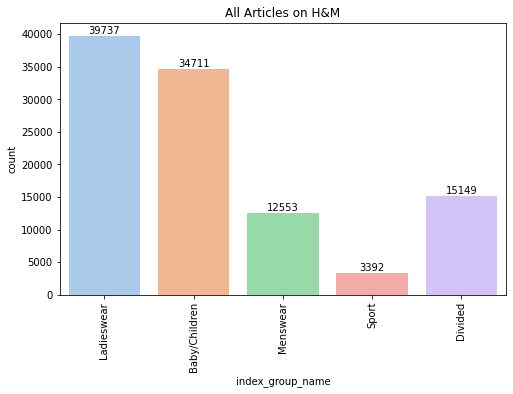

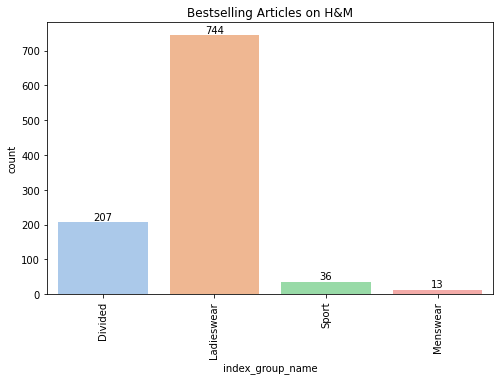

In [14]:
plt.figure(figsize=(8,5))
g = sns.countplot(x="index_group_name", 
                  data=df_articles,
                  palette="pastel")
g.bar_label(g.containers[0])
g.tick_params(axis='x', rotation=90)
plt.title('All Articles on H&M')
plt.show(g)
plt.figure(figsize=(8,5))
g = sns.countplot(x="index_group_name", 
                  data=bestsellers,
                  palette="pastel")
g.bar_label(g.containers[0])
g.tick_params(axis='x', rotation=90)
plt.title('Bestselling Articles on H&M')
plt.show(g)

A quick look at the Divided Collection on the official H&M website shows that it is targeted towards feminine styles. We can see that most bestselling articles were designed for the female demographic. It is inferred that most customers that contribute to the sales of H&M articles belong to the female demographic. Besides that, although H&M produces a lot of Baby/Children articles, none of them made it to the bestsellers.

### Who contributes to the bestsellers? 
Let's see if there is a certain age group that contributes mostly to the sales of the bestselling articles.

In [15]:
bestsellers_transactions = df_transactions[df_transactions['article_id'].isin(bestsellers['article_id'])]
bestsellers_contributors = df_customers[df_customers['customer_id'].isin(bestsellers_transactions['customer_id'])]
bestsellers_contributors.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,6883939031699146327,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,-7200416642310594310,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
4,-283965518499174310,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
5,-2477030216582433370,NaN,NaN,NaN,NaN,NaN,2c29ae653a9282cce4151bd87643c907644e09541abc28...
6,-3402710142238164438,NaN,NaN,ACTIVE,NONE,20.0,fe7b8e2b3fafb89ca90db17ffeeae0fd29b795d803f749...


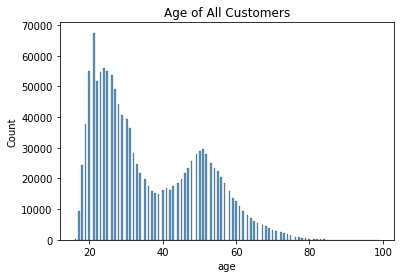

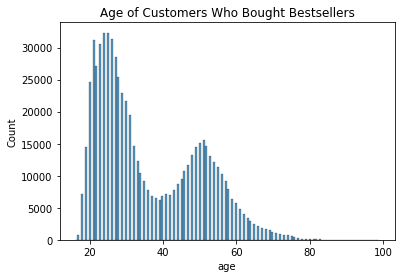

In [16]:
# age of customers
g = sns.histplot(df_customers['age'], #Plot univariate distribution
                 kde=False)
plt.title('Age of All Customers')
plt.show(g)
# age of customers who bought the bestsellers
g = sns.histplot(bestsellers_contributors['age'], #Plot univariate distribution
                 kde=False)
plt.title('Age of Customers Who Bought Bestsellers')
plt.show(g)

Comparing the age distribution of all customers and that of customers who bought the bestsellers, the distributions look similar. The bestsellers were catering to **all ages** of the customer base. This may be the reason why they became bestsellers.

### How are the bestsellers priced?
*NOTE: The price data is transformed from the original currency values, so the values do not mean the actual price in any currency. The data providers did not provide information on how the price data is transformed.*

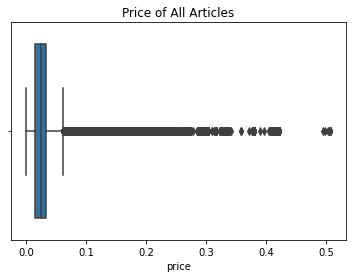

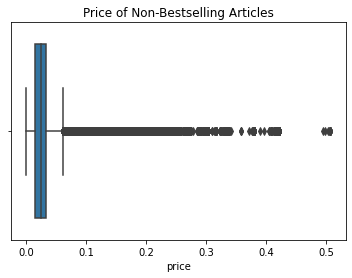

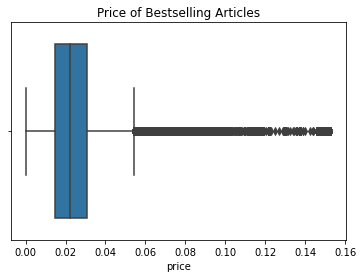

In [17]:
# drop duplicates such that each article at each price point is only considered once
df_transactions_single = df_transactions.drop_duplicates()

# price
g = sns.boxplot(x=df_transactions_single['price'])
plt.title('Price of All Articles')
plt.show(g)

g = sns.boxplot(x=df_transactions_single[~df_transactions_single['article_id'].isin(bestsellers['article_id'])]['price'])
plt.title('Price of Non-Bestselling Articles')
plt.show(g)

g = sns.boxplot(x=df_transactions_single[df_transactions_single['article_id'].isin(bestsellers['article_id'])]['price'])
plt.title('Price of Bestselling Articles')
plt.show(g)


Duplicates of transactions are removed so that every article at each price point is only considered once in the analysis of price distribution. The price distribution of non-bestselling articles is similar to all transactions, that is positively skewed. Most bestselling articles are the relatively **cheaper** offerings. None of the more expensive items (`price` > 0.25) made it to the bestsellers.

### Which articles generate the most revenue? Are they the cheaper bestselling items or more expensive items?

Since the prices are not the actual currency values and no cost data is provided, we cannot calculate and analyse the profits, so we will stick to analysing revenue. The absolute value of the revenues do not mean anything, it is just used for comparison among articles.

In [18]:
article_revenue = df_transactions.groupby('article_id').sum()
article_revenue.drop(columns=['customer_id', 'sales_channel_id', 'year', 'month', 'day'], inplace=True)
article_revenue_ranking = article_revenue.sort_values(by='price', ascending=False)
article_revenue_ranking.rename(columns={'price':'total_revenue_2019'}, inplace=True)
article_revenue_ranking.head(10)

,total_revenue_2019
article_id,
706016001,961.630203
706016002,724.329627
568601006,558.561610
706016003,406.686593
448509014,395.292847
562245046,387.646017
687704001,369.905814
399223001,357.103407
706016015,331.021492


The first two articles actually correspond to the top 2 bestsellers discovered earlier.

From before, there are 105542 distinct `article_id` in the articles dataset. Hence we define the **top 1000** (~1%) articles bringing in the most revenue as the **top_performers**. 

In [19]:
# add 2019 revenue data to df_articles
article_revenue = df_transactions.groupby('article_id').sum()
def f(x):
    try:
        return article_revenue.loc[x]['price']
    except:
        return 0
df_articles['total_revenue_2019'] = df_articles['article_id'].apply(f)
df_articles

,article_id,product_code,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc,total_sales_2019,total_revenue_2019
0,108775015,108775,Strap top,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,5730,47.122797
1,108775044,108775,Strap top,Vest top,Garment Upper body,Solid,White,Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,4993,40.748695
2,108775051,108775,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Dusty Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,2,0.016915
3,110065001,110065,OP T-shirt (Idro),Bra,Underwear,Solid,Black,Dark,Black,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",520,9.613000
4,110065002,110065,OP T-shirt (Idro),Bra,Underwear,Solid,White,Light,White,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",279,4.594932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,Socks,Socks & Tights,Placement print,Black,Dark,Black,Socks Bin,Menswear,Menswear,Men Underwear,Socks and Tights,Socks in a fine-knit cotton blend with a small...,0,0.000000
105538,953763001,953763,SPORT Malaga tank,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey,Ladieswear,Ladieswear,H&M+,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...,0,0.000000
105539,956217002,956217,Cartwheel dress,Dress,Garment Full body,Solid,Black,Dark,Black,Jersey,Ladieswear,Ladieswear,Womens Trend,Jersey Fancy,"Short, A-line dress in jersey with a round nec...",0,0.000000
105540,957375001,957375,CLAIRE HAIR CLAW,Hair clip,Accessories,Solid,Black,Dark,Black,Small Accessories,Divided,Divided,Divided Accessories,Accessories,Large plastic hair claw.,0,0.000000


In [20]:
top_performers = df_articles.sort_values(by='total_revenue_2019', ascending=False).head(1000)
# New column: 1 if article is bestseller AND top_performer, else 0
df_articles['bestseller_revenue'] = df_articles['article_id'].isin(top_performers['article_id']).astype(int) * df_articles['article_id'].isin(bestsellers['article_id']).astype(int)

In [21]:
print("Number of articles that are both bestselling and top performing:", df_articles['bestseller_revenue'].sum())

Number of articles that are both bestselling and top performing: 587


**58.7%** of the bestsellers are also top performing (i.e. contributes to the top ~1% of revenue).

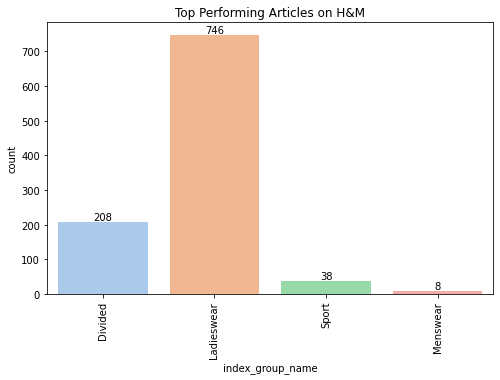

In [22]:
# plt.figure(figsize=(8,5))
# g = sns.countplot(x="index_group_name", 
#                   data=df_articles,
#                   palette="husl")
# g.bar_label(g.containers[0])
# g.tick_params(axis='x', rotation=90)
# plt.title('All Articles on H&M')
# plt.show(g)
plt.figure(figsize=(8,5))
g = sns.countplot(x="index_group_name", 
                  data=top_performers,
                  palette="pastel")
g.bar_label(g.containers[0])
g.tick_params(axis='x', rotation=90)
plt.title('Top Performing Articles on H&M')
plt.show(g)

Again, similar to the bestsellers, most customers that contribute to the revenue of H&M articles belong to the female demographic. Although H&M produces a lot of Baby/Children articles, none of them made it to the top performers. 

The distribution is similar to the bestsellers. Let's see if the sales and revenues are correlated.

In [23]:
#df['A'].corr(df['B'])
df_articles['total_sales_2019'].corr(df_articles['total_revenue_2019'])

0.8637087587194995

Unsurprisingly, they are strongly correlated.

### How does each group of articles contribute to the revenue of H&M?
Let us look at the breakdown of revenue by `index_group_name`.

In [24]:
index_group_revenue = df_articles[['index_group_name','total_revenue_2019']].groupby('index_group_name').total_revenue_2019.sum().reset_index()
index_group_revenue

,index_group_name,total_revenue_2019
0,Baby/Children,11025.073136
1,Divided,97801.667695
2,Ladieswear,305267.235695
3,Menswear,24685.962153
4,Sport,16824.939288


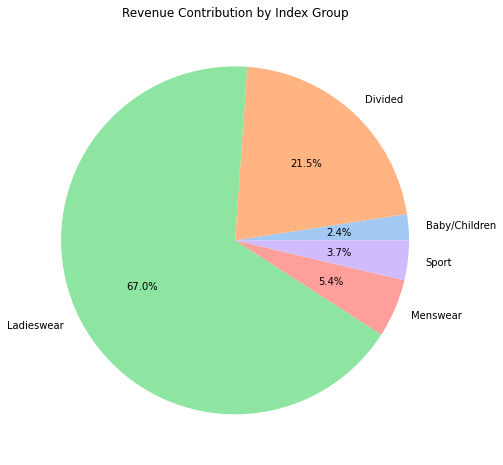

In [25]:
plt.figure(figsize=(8,8))
colors = sns.color_palette('pastel')
plt.pie(x=index_group_revenue['total_revenue_2019'], labels=index_group_revenue['index_group_name'], colors=colors, autopct='%1.1f%%')
plt.title('Revenue Contribution by Index Group')
plt.show()

Ladieswear and Divided, which are both feminine styles, contribute to **88.5%** of revenue in 2019.

### Focusing on the #1 bestseller / top performer, how do its price and sales vary along time?

In [26]:
list(df_articles[df_articles['article_id'] == 706016001]['detail_desc'])[0]

'High-waisted jeans in washed superstretch denim with a zip fly and button, fake front pockets, real back pockets and super-skinny legs.'

In [27]:
num1_transactions = df_transactions[df_transactions['article_id'] == 706016001]
num1_transactions.tail()

,t_dat,customer_id,article_id,price,sales_channel_id,year,month,day
20806370,2019-12-31,-4119450782388811488,706016001,0.033881,1,19,12,31
20806492,2019-12-31,7497827688329659750,706016001,0.030492,2,19,12,31
20806517,2019-12-31,562928425408932582,706016001,0.033881,1,19,12,31
20807305,2019-12-31,8748820586202779005,706016001,0.030492,2,19,12,31
20808083,2019-12-31,9423813441034434,706016001,0.016932,1,19,12,31


Interestingly, the price of the same article on the same day could be different.

We calculate the daily average price for further analysis.

In [28]:
num1_day = num1_transactions.groupby(['t_dat']).mean()
#num1_day_sales = num1_transactions.groupby(['t_dat']).count()
num1_day['daily_sales'] = num1_transactions.groupby(['t_dat']).count()['customer_id']
num1_day

,customer_id,article_id,price,sales_channel_id,year,month,day,daily_sales
t_dat,,,,,,,,
2019-01-01,1.524446e+18,706016001.0,0.033881,2.000000,19.0,1.0,1.0,32
2019-01-02,1.222791e+18,706016001.0,0.033608,1.771429,19.0,1.0,2.0,70
2019-01-03,1.521202e+17,706016001.0,0.033341,1.741935,19.0,1.0,3.0,93
2019-01-04,-9.543920e+16,706016001.0,0.033132,1.808511,19.0,1.0,4.0,94
2019-01-05,4.054734e+17,706016001.0,0.033417,1.806452,19.0,1.0,5.0,93
...,...,...,...,...,...,...,...,...
2019-12-27,1.889762e+18,706016001.0,0.032946,1.746835,19.0,12.0,27.0,79
2019-12-28,-4.088170e+17,706016001.0,0.032548,1.618421,19.0,12.0,28.0,76
2019-12-29,-1.323665e+18,706016001.0,0.033049,1.850575,19.0,12.0,29.0,87


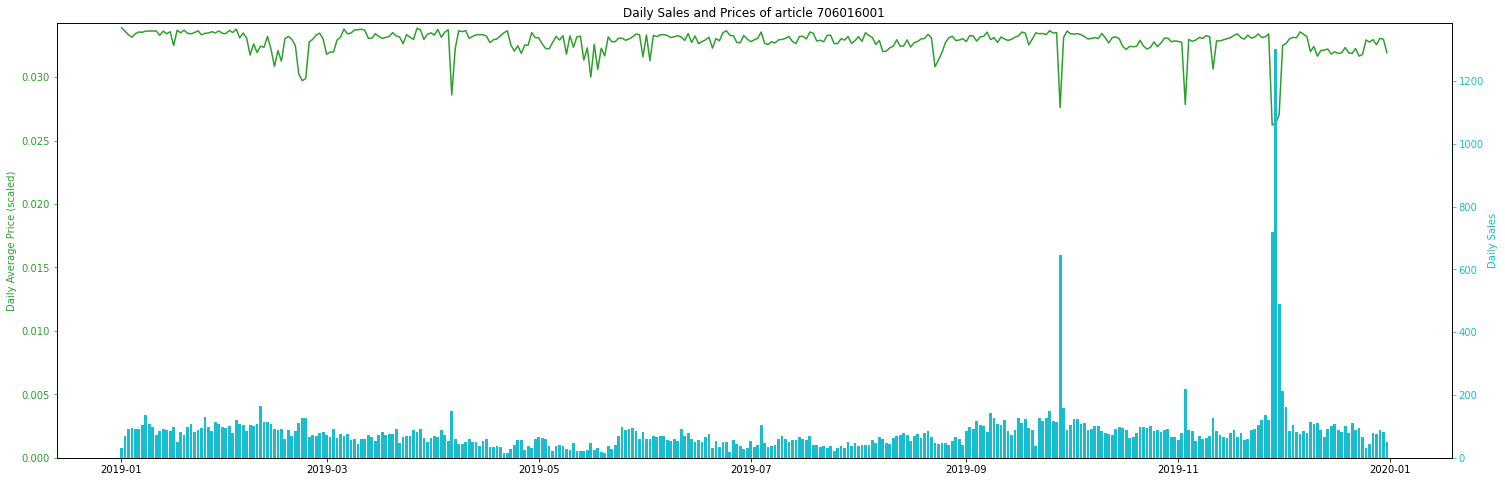

In [29]:
article_id_of_interest = 706016001

plt.rc('figure', figsize=(25, 8))   # this is to overwrite default aspect of graph to make x-axis longer

fig, ax1 = plt.subplots()
ax1.plot(num1_day.index, num1_day['price'], color='#2ca02c')
ax1.set_ylabel('Daily Average Price (scaled)', color='#2ca02c')
ax1.tick_params('y', colors='#2ca02c')
ax1.set_ylim(bottom=max(num1_day['price'].min()-num1_day['price'].mean(), 0))
ax2 = plt.twinx()
ax2.bar(num1_day.index, num1_day['daily_sales'], color='#17becf')
ax2.set_ylabel('Daily Sales', color='#17becf')
ax2.tick_params('y', colors='#17becf')
ax2.set_ylim(top=num1_day['daily_sales'].max()+num1_day['daily_sales'].mean())
plt.title('Daily Sales and Prices of article {}'.format(article_id_of_interest))
plt.show()

In [30]:
num1_day.sort_values(by='daily_sales', ascending=False).head()

,customer_id,article_id,price,sales_channel_id,year,month,day,daily_sales
t_dat,,,,,,,,
2019-11-29,-2.130017e+17,706016001.0,0.026384,1.947813,19.0,11.0,29.0,1303
2019-11-28,-2.439654e+17,706016001.0,0.026217,1.963788,19.0,11.0,28.0,718
2019-09-28,8.699796e+16,706016001.0,0.027598,1.948837,19.0,9.0,28.0,645
2019-11-30,-6.418614e+16,706016001.0,0.027006,1.942857,19.0,11.0,30.0,490
2019-11-03,-2.125676e+17,706016001.0,0.027833,1.958716,19.0,11.0,3.0,218


We can see that price dips in Autumn and Winter results in strong peaks in the daily sales. Price dips in other months were less impactful on the daily sales. The lowest price dip occured during Black Friday, which had significant sales.

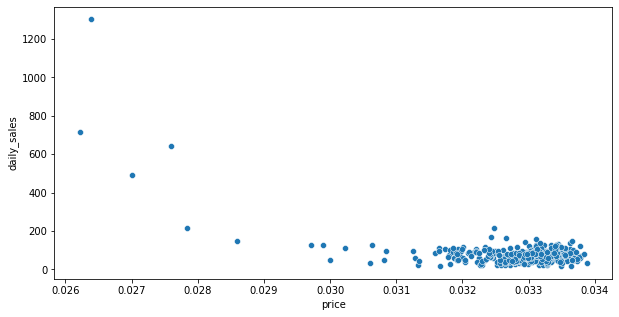

In [31]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price',y='daily_sales',data=num1_day)
plt.show()

There are very little datapoints at the lower prices but it is obvious that lower prices generate more sales when price < 0.03.

### What about other articles? How are their sales and price trends different or similar to the #1 bestseller?

In [32]:
import os
import matplotlib.image as mpimg

def view_article_trend(article_id_of_interest):
    
    # find image of article
    file_path = '/kaggle/input/h-and-m-personalized-fashion-recommendations/images/0{}/0{}.jpg'.format(str(article_id_of_interest)[:2],article_id_of_interest)
    if os.path.exists(file_path):
        img = mpimg.imread(file_path)
        #plt.imshow(img)
    else:
        img = None

    # calculate the daily sales and average prices 
    article_daily_sales = df_transactions.groupby(['article_id','t_dat'])['article_id'].count()
    article_daily_sales = article_daily_sales.reset_index(name='daily_sales')
    article_daily_price = df_transactions.groupby(['article_id','t_dat'])['price'].mean()
    article_daily_price = article_daily_price.reset_index(name='avg_price')
    article_daily_price = article_daily_price[article_daily_price['article_id'] == article_id_of_interest]
    article_daily_sales = article_daily_sales[article_daily_sales['article_id'] == article_id_of_interest]
    article_daily_sales['avg_price'] = article_daily_price['avg_price']

    # plot daily price vs sales
    fig, (ax1, ax2) = plt.subplots(1, 2)
    sns.scatterplot(x='avg_price',y='daily_sales',data=article_daily_sales, ax=ax1)
    ax1.title.set_text('Price vs Sales of article {}'.format(article_id_of_interest))
    # display image of article
    if img is not None:
        ax2.imshow(img)
        ax2.title.set_text('Image of article {}'.format(article_id_of_interest))
    else:
        ax2.title.set_text('No image found.')
        plt.show()

    # plot temporal change in price and sales
    fig, ax1 = plt.subplots()
    ax1.plot(article_daily_sales['t_dat'], article_daily_sales['avg_price'], color='#2ca02c')
    ax1.set_ylabel('Daily Average Price (scaled)', color='#2ca02c')
    ax1.tick_params('y', colors='#2ca02c')
    ax1.set_ylim(bottom=max(article_daily_sales['avg_price'].min()-article_daily_sales['avg_price'].mean(), 0))
    ax2 = plt.twinx()
    ax2.bar(article_daily_sales['t_dat'], article_daily_sales['daily_sales'], color='#17becf')
    ax2.set_ylabel('Daily Sales', color='#17becf')
    ax2.tick_params('y', colors='#17becf')
    ax2.set_ylim(top=article_daily_sales['daily_sales'].max()+article_daily_sales['daily_sales'].mean())
    plt.title('Daily Sales and Prices of article {}'.format(article_id_of_interest))
    plt.show()

    print('Article {}:'.format(article_id_of_interest))
    print(list(df_articles[df_articles['article_id']==article_id_of_interest]['detail_desc'])[0])

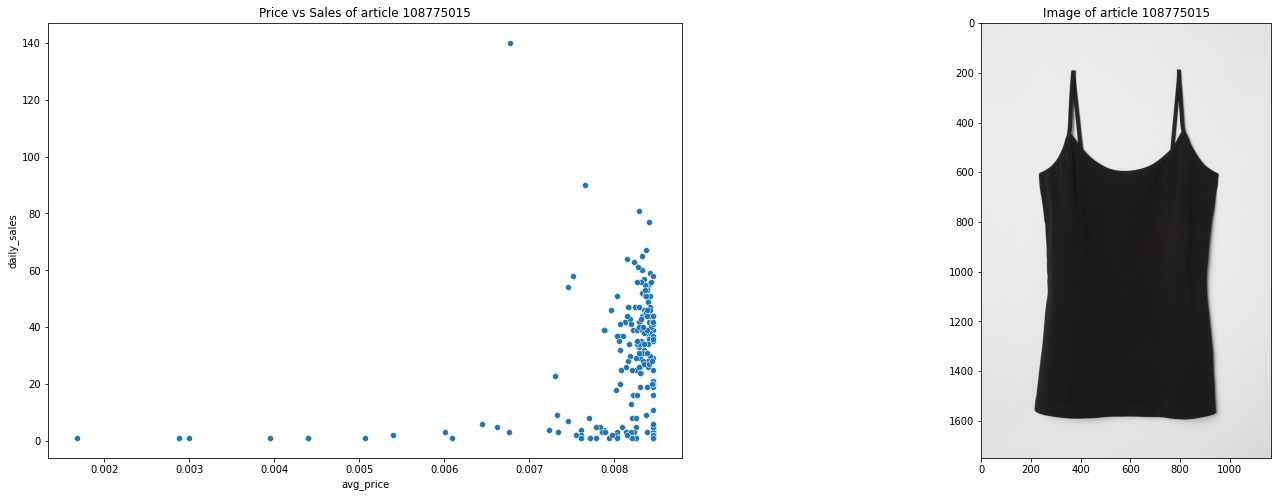

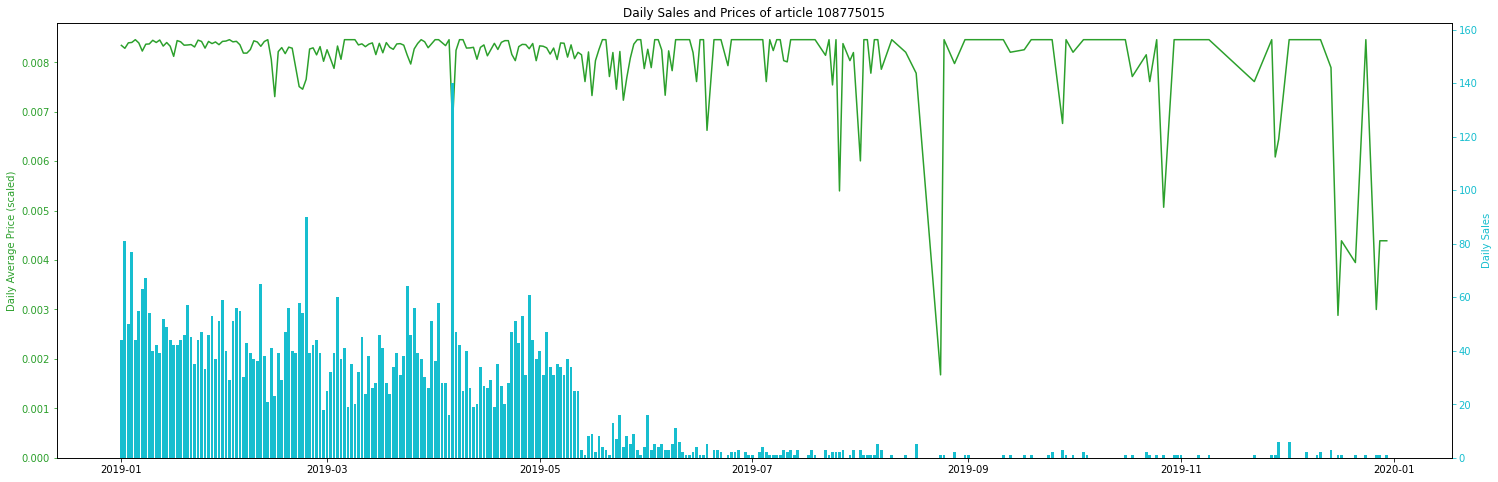

Article 108775015:
Jersey top with narrow shoulder straps.


In [33]:
view_article_trend(108775015) # [Insert article_id that we are interested in exploring]

For article 108775015, 
- From the scatterplot we can see that reducing its price does not increase its sales. 
- Looking at the daily trends, firstly we see that sales were higher in the first half of the year. The price dips in February till May cause spikes in sales. 
- Price dips occurred most significantly in the later part of the year, which is the winter season in the Northen Hemisphere. Looking at the image of the article, it is thus not surprising that sales were lower when the weather is cold.
- One thing unusual is the low sales during summer (mid-May till August). Further data regarding marketing strategy, actual location of buyers (instead of encoded zip codes that do not give any geographical insights) may be helpful.

# Next Steps
Some directions that I hope to work on moving forward:
1. Frequent Pattern Mining - "Customers who bought article A freqeuntly also bought ... "
2. Recommender System - Collaborative Filtering, Content-Based Recommendation